In [14]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 2. Load data
sentiment_df = pd.read_csv("fear_greed_index.csv")
trading_df = pd.read_csv("historical_data.csv")

In [16]:
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [17]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [18]:
sentiment_df.isnull()

,timestamp,value,classification,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2639,False,False,False,False
2640,False,False,False,False
2641,False,False,False,False
2642,False,False,False,False


In [19]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [20]:
trading_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [21]:
trading_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [22]:
trading_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [23]:
# 3. Convert dates
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trading_df['Timestamp IST'] = pd.to_datetime(trading_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trading_df['date'] = trading_df['Timestamp IST'].dt.date
trading_df['date'] = pd.to_datetime(trading_df['date'])

In [24]:
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [25]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [26]:
# 4. Merge datasets on date
merged_df = pd.merge(trading_df, sentiment_df[['date', 'classification']], on='date', how='left')

In [27]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed


In [28]:
# 5. Feature Engineering
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce').fillna(0)
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce').fillna(0)

merged_df['ROI'] = merged_df.apply(lambda row: row['Closed PnL'] / row['Size USD'] if row['Size USD'] != 0 else 0, axis=1)
merged_df['Win'] = (merged_df['Closed PnL'] > 0).astype(int)


In [41]:
merged_df['Closed PnL']

,Closed PnL
0,0.0000
1,0.0000
2,0.0000
3,0.0000
4,0.0000
...,...
211219,-20.2566
211220,-112.5773
211221,-22.4402
211222,-190.7894


In [29]:

# 6. Group by trader and sentiment
grouped = merged_df.groupby(['Account', 'classification']).agg({
    'Closed PnL': ['mean', 'sum'],
    'ROI': 'mean',
    'Win': 'mean',
    'Execution Price': 'count'
}).reset_index()

In [30]:
grouped

Account classification   Closed PnL  \
                                                                       mean   
0    0x083384f897ee0f19899168e3b1bec365f52a9012   Extreme Fear  1247.692214   
1    0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed   -42.626810   
2    0x083384f897ee0f19899168e3b1bec365f52a9012           Fear   626.194346   
3    0x083384f897ee0f19899168e3b1bec365f52a9012          Greed   482.089321   
4    0x083384f897ee0f19899168e3b1bec365f52a9012        Neutral   298.456334   
..                                          ...            ...          ...   
151  0xbee1707d6b44d4d52bfe19e41f8a828645437aab   Extreme Fear     6.059085   
152  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  Extreme Greed    71.219912   
153  0xbee1707d6b44d4d52bfe19e41f8a828645437aab           Fear     4.339105   
154  0xbee1707d6b44d4d52bfe19e41f8a828645437aab          Greed    33.169735   
155  0xbee1707d6b44d4d52bfe19e41f8a828645437aab        Neutral     3.330061   

                        ROI       Win Execution Price  
              sum      mean      mean           count  
0    1.247692e+05  0.052553  0.370000             100  
1   -4.028234e+04 -0.001763  0.066667             945  
2    1.113374e+06  0.053921  0.526434            1778  
3    2.767193e+05  0.030677  0.160279             574  
4    1.256501e+05  0.017256  0.581948             421  
..            ...       ...       ...             ...  
151  3.077409e+04  0.004935  0.413270            5079  
152  4.788115e+05  0.035275  0.596311            6723  
153  5.597880e+04  0.002546  0.376560           12901  
154  2.433995e+05  0.019938  0.464704            7338  
155  2.711668e+04  0.001719  0.347783            8143  

[156 rows x 7 columns]

In [31]:

# 7. Rename columns
grouped.columns = ['Account', 'Sentiment', 'Avg_PnL', 'Total_PnL', 'Avg_ROI', 'Win_Rate', 'Trades']



In [32]:
grouped.columns

Index(['Account', 'Sentiment', 'Avg_PnL', 'Total_PnL', 'Avg_ROI', 'Win_Rate',
       'Trades'],
      dtype='object')

In [33]:
# 8. Sort by performance
top_traders = grouped.sort_values(by=['Sentiment', 'Total_PnL'], ascending=[True, False])

In [34]:
top_traders

,Account,Sentiment,Avg_PnL,Total_PnL,Avg_ROI,Win_Rate,Trades
142,0xbaaaf6571ab7d571043ff1e313a9609a10637864,Extreme Fear,58.463834,261917.977792,0.012700,0.379464,4480
80,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Extreme Fear,900.002541,198900.561610,0.094151,0.420814,221
55,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Extreme Fear,169.063285,166696.399486,0.013623,0.309331,986
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,1247.692214,124769.221441,0.052553,0.370000,100
60,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Extreme Fear,200.395004,74346.546606,0.007296,0.428571,371
...,...,...,...,...,...,...,...
89,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Neutral,-1.780025,-2605.956471,0.016829,0.715164,1464
84,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Neutral,-79.415763,-4526.698469,-0.038929,0.000000,57
9,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Neutral,-16.573722,-11933.080125,-0.025609,0.361111,720
14,0x271b280974205ca63b716753467d5a371de622ab,Neutral,-31.783540,-19038.340561,-0.009311,0.000000,599


In [35]:
# 9. Save to CSV
top_traders.to_csv("sentiment_trader_performance.csv", index=False)

In [36]:
#Display top results
print(top_traders.head(10))

                                        Account     Sentiment      Avg_PnL  \
142  0xbaaaf6571ab7d571043ff1e313a9609a10637864  Extreme Fear    58.463834   
80   0x72c6a4624e1dffa724e6d00d64ceae698af892a0  Extreme Fear   900.002541   
55   0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  Extreme Fear   169.063285   
0    0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Fear  1247.692214   
60   0x4f93fead39b70a1824f981a54d4e55b278e9f760  Extreme Fear   200.395004   
146  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  Extreme Fear    97.448381   
75   0x72743ae2822edd658c0c50608fd7c5c501b2afbd  Extreme Fear    66.758350   
151  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  Extreme Fear     6.059085   
85   0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  Extreme Fear    81.243158   
10   0x271b280974205ca63b716753467d5a371de622ab  Extreme Fear    20.962214   

         Total_PnL   Avg_ROI  Win_Rate  Trades  
142  261917.977792  0.012700  0.379464    4480  
80   198900.561610  0.094151  0.420814     

<ipython-input-37-3d2d3c6849cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grouped, x='Sentiment', y='Total_PnL', palette="viridis")


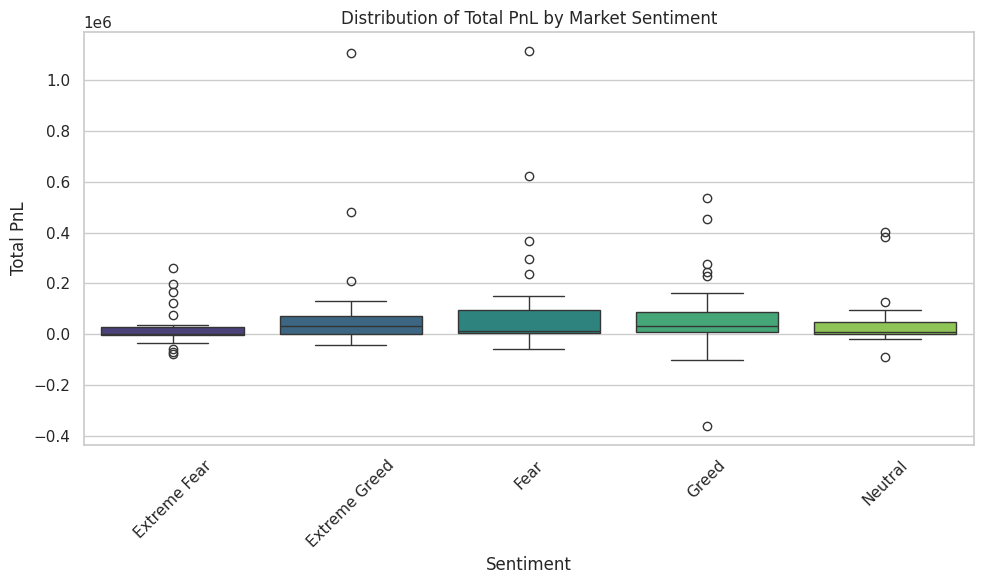

In [37]:
sns.set(style="whitegrid")

# 1. Distribution of Total PnL by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped, x='Sentiment', y='Total_PnL', palette="viridis")
plt.title("Distribution of Total PnL by Market Sentiment")
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-38-d8f8527f998c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_sentiment, x='Sentiment', y='Avg_ROI', palette="coolwarm")


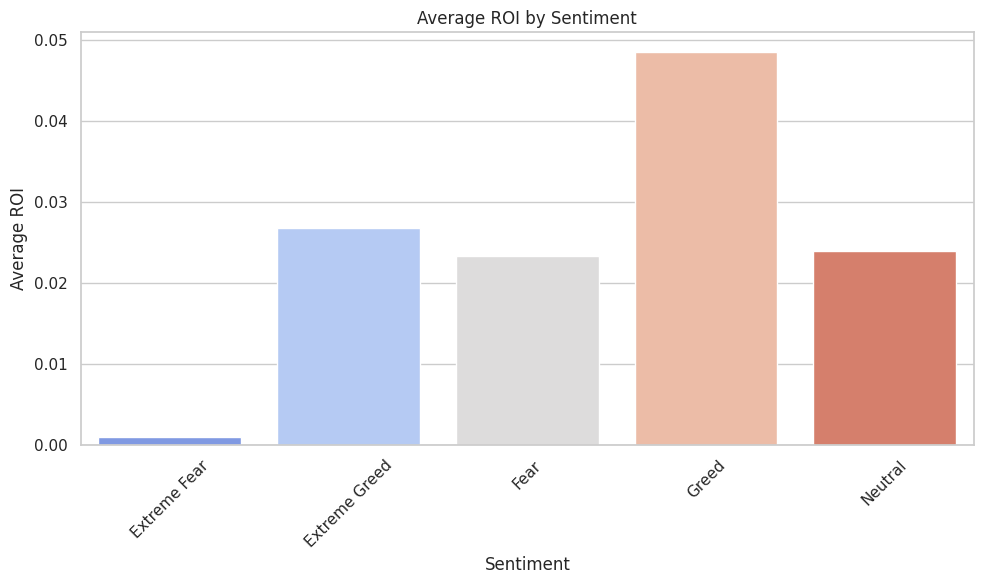

In [38]:
# 2. Average ROI per Sentiment
roi_sentiment = grouped.groupby("Sentiment")["Avg_ROI"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=roi_sentiment, x='Sentiment', y='Avg_ROI', palette="coolwarm")
plt.title("Average ROI by Sentiment")
plt.ylabel("Average ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

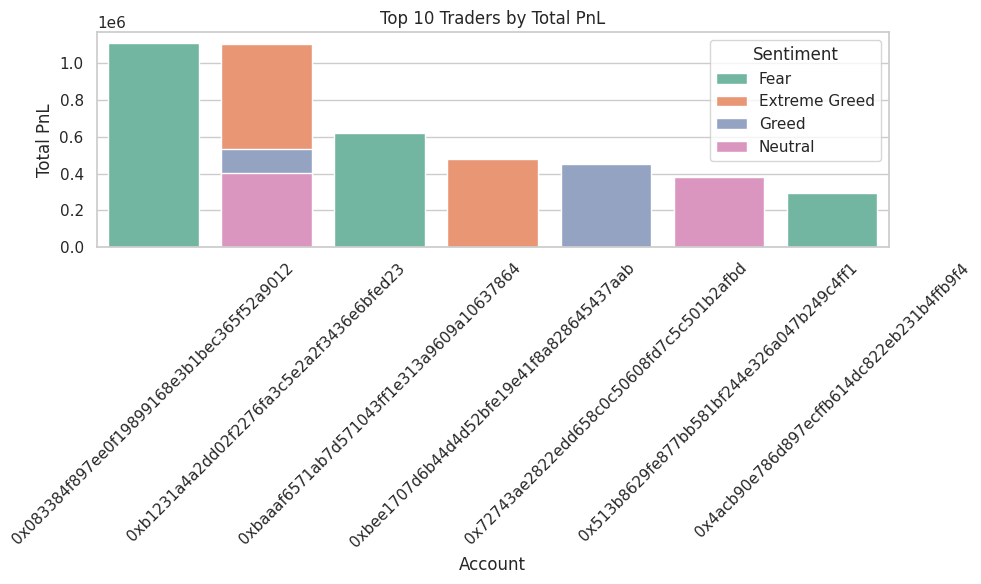

In [39]:
# 3. Top 10 Traders by Total PnL
top10 = grouped.sort_values(by="Total_PnL", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Account', y='Total_PnL', hue='Sentiment', dodge=False, palette="Set2")
plt.title("Top 10 Traders by Total PnL")
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()